<a href="https://colab.research.google.com/github/saerarawas/AAI_635O_B11_202520-Recommender-System/blob/main/Week2/Practical_Exercise_Building_a_Content_Based_Recommender_System_Using_Text_Data_Model_Answer_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip install "numpy<2.0.0" --force-reinstall

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
!pip install --upgrade pip # Upgrade pip to the latest version
!pip uninstall pandas -y # Uninstall pandas
!pip install pandas # Reinstall pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 60.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [4]:
!pip install numpy
!pip install pandas

In [5]:
!pip install --upgrade pip  # Upgrade pip to the latest version
!pip uninstall numpy pandas -y  # Uninstall both numpy and pandas
!pip install numpy==1.25.2  # Install numpy first
!pip install pandas  # Reinstall pandas

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 98.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.14.4 requires pandas!=2.1.0,>=1.4, which is not installed.
pymc 5.21.2 requires pandas>=0.24.0, which is not installed.
prophet 1.1.6 requires pandas>=1.0.4, which is not installed.
dopamine-rl 4.1.2 requires pandas>=0.24.2, which is not installed.
yfinance 0.2.55 requires pandas>=1.3.0, which is not installed.
geemap 0.35.3 requires pandas, which is not installed.
db-dtypes 1.4.2 requires pandas>=0.24.2, which is not installed.
arviz 0.21.0 requires pandas>=1.5.0, which is not installed.
datascience 0.17.6 r

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
^C


In [1]:
#Importing the libraries

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances, euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from gensim import models
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from gensim.models import FastText as ft
from IPython.display import Image
import os
from sklearn.decomposition import PCA

import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
# Download GloVe
#!wget https://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip
#
# ------------------- 1. Load Pretrained Word Embeddings -------------------
# Load GloVe embeddings
import pandas as pd
print("Loading GloVe Model...")
glove_df = pd.read_csv("/content/glove.6B.300d.txt", sep=" ",
                       quoting=3, header=None, index_col=0)
glove_model = {key: value.values for key, value in glove_df.T.items()}

# Download the pre-trained model
word2vecModel = api.load("word2vec-google-news-300")

Loading GloVe Model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
# ------------------- Generate Sentence Embeddings -------------------
def get_sentence_vector(sentence, model, embedding_size=300):
    """Get sentence embedding by averaging word vectors."""
    words = nltk.word_tokenize(sentence.lower())
    sentence_vector = np.zeros((embedding_size,))
    count = 0

    for word in words:
        if word in model:
            sentence_vector += model[word]
            count += 1

    return sentence_vector / count if count > 0 else sentence_vector


In [5]:
# ------------------- Generate Sentence Embeddings -------------------
def get_sentence_vector(sentence, model, embedding_size=100):
    """Get sentence embedding by averaging word vectors."""
    words = nltk.word_tokenize(sentence.lower())
    sentence_vector = np.zeros((embedding_size,))
    count = 0

    for word in words:
        if word in model:
            sentence_vector += model[word]
            count += 1

    return sentence_vector / count if count > 0 else sentence_vector


In [6]:
# ------------------- Generate Sentence Embeddings -------------------
def get_sentence_vector(sentence, model, embedding_size=50):
    """Get sentence embedding by averaging word vectors."""
    words = nltk.word_tokenize(sentence.lower())
    sentence_vector = np.zeros((embedding_size,))
    count = 0

    for word in words:
        if word in model:
            sentence_vector += model[word]
            count += 1

    return sentence_vector / count if count > 0 else sentence_vector


In [10]:
# Load the dataset
df = pd.read_csv("/content/Rec_sys_content.csv", quotechar='"', escapechar="\\")

# Extract the 3rd column (product description)
product_descriptions = df.iloc[:, 2].dropna().astype(str).tolist()

# Print a few descriptions to verify
print(product_descriptions[:5])  # Print the first 5 descriptions


['New unique design, great gift.High quality plastic material.Clips over the back of the device to protect the back &amp; sides from bumps and scratches.Printed using a process called sublimation, high quality image which will last for years!| New unique design, great gift. High quality plastic material. Clips over the back of the device to protect the back &amp; sides from bumps and scratches. Printed using a process called sublimation, high quality image which will last for years! ', 'Rounded rectangular cat-eye reading glasses. These frames feature a deep burgundy color on the face of the frame with crystal interior, as well as crystal temple detail and yellow, turqoise and black marbled colors on the inside of the temple arms. The standard hinges provide durability and the TR-90 con struction allows for some flex making these glasses very sturdy and perfect for every day use!| Always custom made to your individual order specifications in our FDA Listed Lab with the remarkable Optic

In [11]:
def clean_text(text):
    # Remove the dollar sign and any other special characters if necessary
    text = re.sub(r'\$', '', text)  # Remove dollar signs
    return text

product_descriptions = [clean_text(description) for description in product_descriptions]

In [13]:
# ------------------- Generate Sentence Embeddings -------------------
def get_sentence_vector(sentence, model, embedding_size=300): # Changed embedding_size to 300
    """Get sentence embedding by averaging word vectors."""
    words = nltk.word_tokenize(sentence.lower())
    sentence_vector = np.zeros((embedding_size,))
    count = 0

    for word in words:
        if word in model:
            sentence_vector += model[word]
            count += 1

    return sentence_vector / count if count > 0 else sentence_vector

In [14]:
# ------------------- Compute Embeddings -------------------
word2vec_embeddings = np.array([get_sentence_vector(desc, word2vecModel) for desc in product_descriptions])
glove_embeddings = np.array([get_sentence_vector(desc, glove_model) for desc in product_descriptions])

In [27]:
# Check which embeddings have NaN values
for method, embeddings in embeddings_dict.items():
    print(f"NaN values in {method}:", np.isnan(embeddings).any())

NaN values in Word2Vec: False
NaN values in GloVe: False


In [28]:
def fix_nan_embeddings(embeddings, strategy="remove"):
    """Handle NaN values in embeddings.
    Args:
        embeddings: Input embedding matrix.
        strategy: "remove" (drop NaN rows), "zero" (replace with 0), or "mean" (replace with column mean).
    Returns:
        Cleaned embeddings.
    """
    if not np.isnan(embeddings).any():
        return embeddings  # No NaNs found

    if strategy == "remove":
        return embeddings[~np.isnan(embeddings).any(axis=1)]
    elif strategy == "zero":
        embeddings[np.isnan(embeddings)] = 0
        return embeddings
    elif strategy == "mean":
        col_mean = np.nanmean(embeddings, axis=0)
        nan_indices = np.where(np.isnan(embeddings))
        embeddings[nan_indices] = np.take(col_mean, nan_indices[1])
        return embeddings
    else:
        raise ValueError("Invalid strategy. Use 'remove', 'zero', or 'mean'.")


📝 Running recommendations using Word2Vec embeddings:

🔹 Top 10 Recommendations for: 'New unique design, great gift.High quality plastic material.Clips over the back of the device to protect the back &amp; sides from bumps and scratches.Printed using a process called sublimation, high quality image which will last for years!| New unique design, great gift. High quality plastic material. Clips over the back of the device to protect the back &amp; sides from bumps and scratches. Printed using a process called sublimation, high quality image which will last for years! ' using Word2Vec
   ✅ Hybrid Case Information: Brand new hard plastic case combined with soft rubber gel silicone skin cover. Hybrid case is a molded perfect-fit to your phone. Double the protection both front and back hard cover. Protects your phone against any scratch, bump, finger marks, and dirt. High quality silicone that is resistant to shock and has a great grip. Custom cutout design, giving you total access to all fu

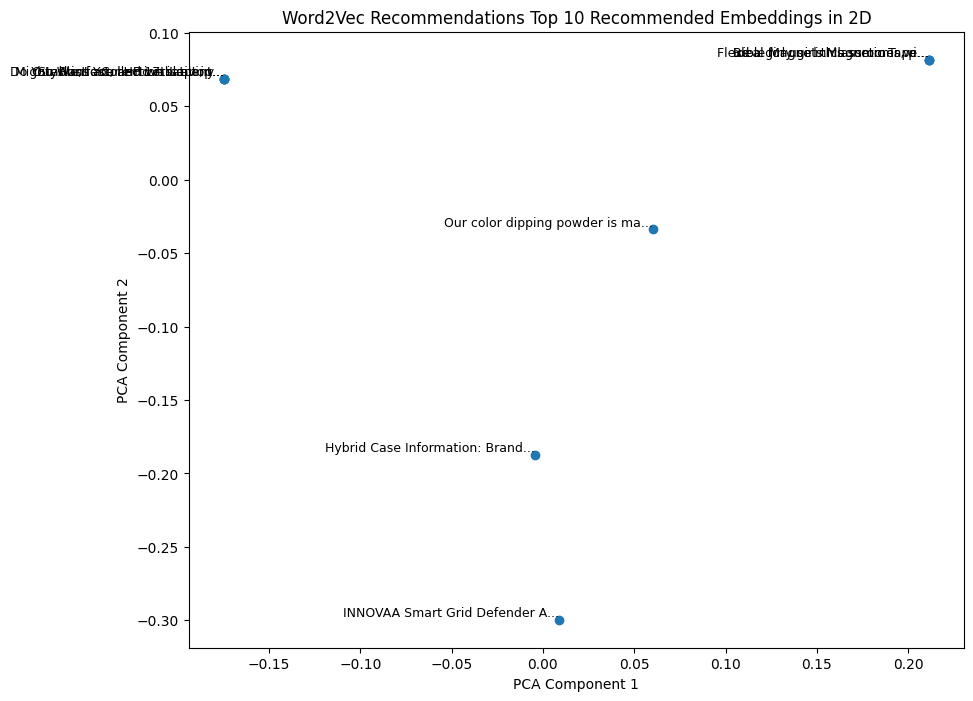


📝 Running recommendations using GloVe embeddings:

🔹 Top 10 Recommendations for: 'New unique design, great gift.High quality plastic material.Clips over the back of the device to protect the back &amp; sides from bumps and scratches.Printed using a process called sublimation, high quality image which will last for years!| New unique design, great gift. High quality plastic material. Clips over the back of the device to protect the back &amp; sides from bumps and scratches. Printed using a process called sublimation, high quality image which will last for years! ' using GloVe
   ✅ Huetron USB 2.0 cable features a standard Type-A USB connector on one end and a standard Type-B connector on the other that is built for connecting and disconnecting over and over again without signal loss. It helps you maximize performance for your devices, such as external hard drives, printers, digital-photography devices, and more. For devices with an older USB version, this cable is backward compatible s

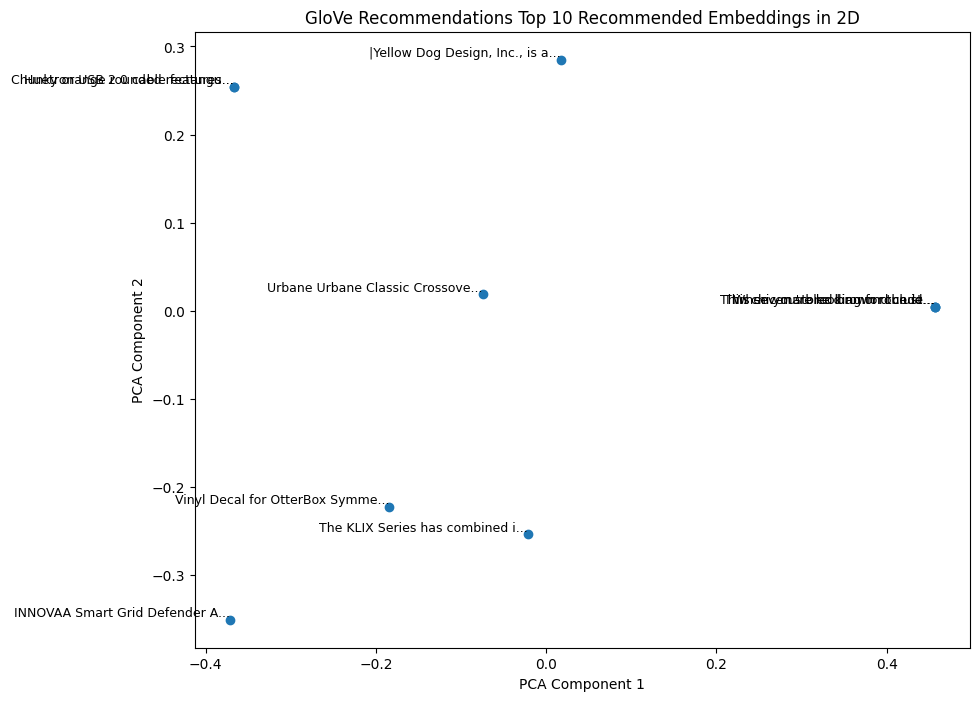

In [29]:
# ------------------- Compute Similarity Scores -------------------
def get_most_similar(query_index, embeddings, descriptions, method="Embedding Model", top_n=10):
    """Compute the most similar products based on cosine similarity."""
    similarities = cosine_similarity([embeddings[query_index]], embeddings)[0]
    sorted_indices = np.argsort(similarities)[::-1][1:]  # Exclude itself

    # Set to track unique descriptions
    unique_descriptions = set()

    # Select top_n most similar products
    top_indices = []
    top_similarities = []
    for idx in sorted_indices:
        if descriptions[idx] not in unique_descriptions:
            unique_descriptions.add(descriptions[idx])
            top_indices.append(idx)
            top_similarities.append(similarities[idx])
        if len(top_indices) == top_n:
            break

    print(f"\n🔹 Top {top_n} Recommendations for: '{descriptions[query_index]}' using {method}")
    for idx, similarity in zip(top_indices, top_similarities):
        print(f"   ✅ {descriptions[idx]} (Similarity: {similarity:.2f})")

    # Return the top_n recommendations' embeddings and descriptions
    top_embeddings = embeddings[top_indices]
    top_descriptions = [descriptions[idx] for idx in top_indices]
    return top_embeddings, top_descriptions


# ------------------- Visualizing Top 10 Recommended Embeddings -------------------
def plot_embeddings(embeddings, descriptions, title, max_label_length=30):
    """Visualize the embeddings of the top recommended products."""
    # Truncate descriptions to avoid long labels
    truncated_labels = [desc[:max_label_length] + '...' if len(desc) > max_label_length else desc for desc in descriptions]

    # Apply PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o')

    # Annotate
    for i, label in enumerate(truncated_labels):
        plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9, ha='right', va='bottom')

    plt.title(f"{title} Top 10 Recommended Embeddings in 2D")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

def process_and_plot(query_product, product_descriptions, embeddings_dict, top_n=10):
    """Process and plot the top recommendations for multiple models."""
    for method, embeddings in embeddings_dict.items():
        # Verify no NaN values remain
        assert not np.isnan(embeddings).any(), f"{method} still contains NaN values"

        print(f"\n📝 Running recommendations using {method} embeddings:")
        top_embeddings, top_descriptions = get_most_similar(
            query_product, embeddings, product_descriptions, method, top_n
        )
        plot_embeddings(top_embeddings, top_descriptions, f"{method} Recommendations")

# ------------------- Running for Multiple Models -------------------
#def process_and_plot(query_product, product_descriptions, embeddings_dict, top_n=10):
#    """Process and plot the top recommendations for multiple models (Word2Vec, GloVe)."""
#    for method, embeddings in embeddings_dict.items():
#        print(f"\n📝 Running recommendations using {method} embeddings:")
#        top_embeddings, top_descriptions = get_most_similar(query_product, embeddings, product_descriptions, method, top_n)
#        plot_embeddings(top_embeddings, top_descriptions, f"{method} Recommendations", max_label_length=50)


embeddings_dict = {
    "Word2Vec": word2vec_embeddings,
    "GloVe": glove_embeddings
}

# Choose a product to base recommendations on
query_product = 0  # Choose first product

# Process and visualize for all models
process_and_plot(query_product, product_descriptions, embeddings_dict, top_n=10)

Loading Word2Vec model...
Word2Vec model loaded successfully.
Loading GloVe model...
GloVe model loaded successfully.

📝 Running recommendations using Word2Vec embeddings:

🔹 Top 10 Recommendations for: 'New unique design, great gift.High quality plastic material.Clips over the back of the device to protect the back &amp; sides from bumps and scratches.Printed using a process called sublimation, high quality image which will last for years!| New unique design, great gift. High quality plastic material. Clips over the back of the device to protect the back &amp; sides from bumps and scratches. Printed using a process called sublimation, high quality image which will last for years! ' using Word2Vec
  ✅ Hybrid Case Information: Brand new hard plastic case combined with soft rubber gel silicone skin cover. Hybrid case is a molded perfect-fit to your phone. Double the protection both front and back hard cover. Protects your phone against any scratch, bump, finger marks, and dirt. High qual

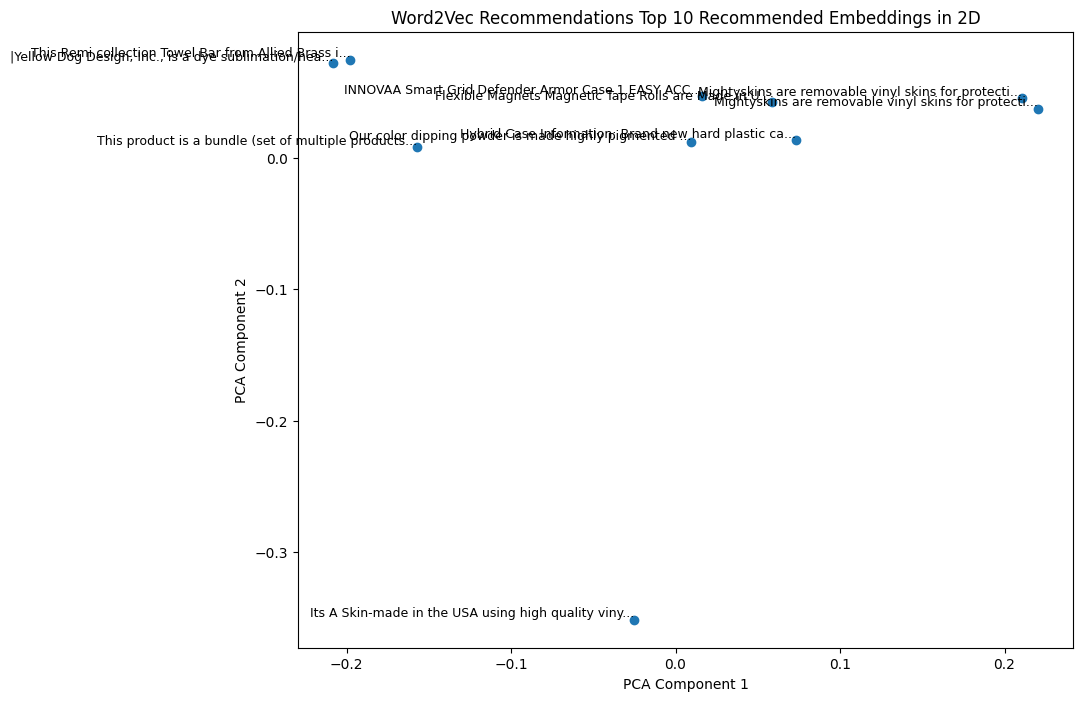


📝 Running recommendations using GloVe embeddings:

🔹 Top 10 Recommendations for: 'New unique design, great gift.High quality plastic material.Clips over the back of the device to protect the back &amp; sides from bumps and scratches.Printed using a process called sublimation, high quality image which will last for years!| New unique design, great gift. High quality plastic material. Clips over the back of the device to protect the back &amp; sides from bumps and scratches. Printed using a process called sublimation, high quality image which will last for years! ' using GloVe
  ✅ Product measures 12 x 8 inchesGallery quality printing100% Made in AmericaHand buffed &amp; diamond polished beveled edges1/8&quot; thick &quot;Grade A&quot; acrylicFoam tape for mounting on most surfaces|Product measures 12 x 8 inchesGallery quality printing100% Made in AmericaHand buffed &amp; diamond polished beveled edges1/8&quot; thick &quot;Grade A&quot; acrylicFoam tape for mounting on most surfacesLant

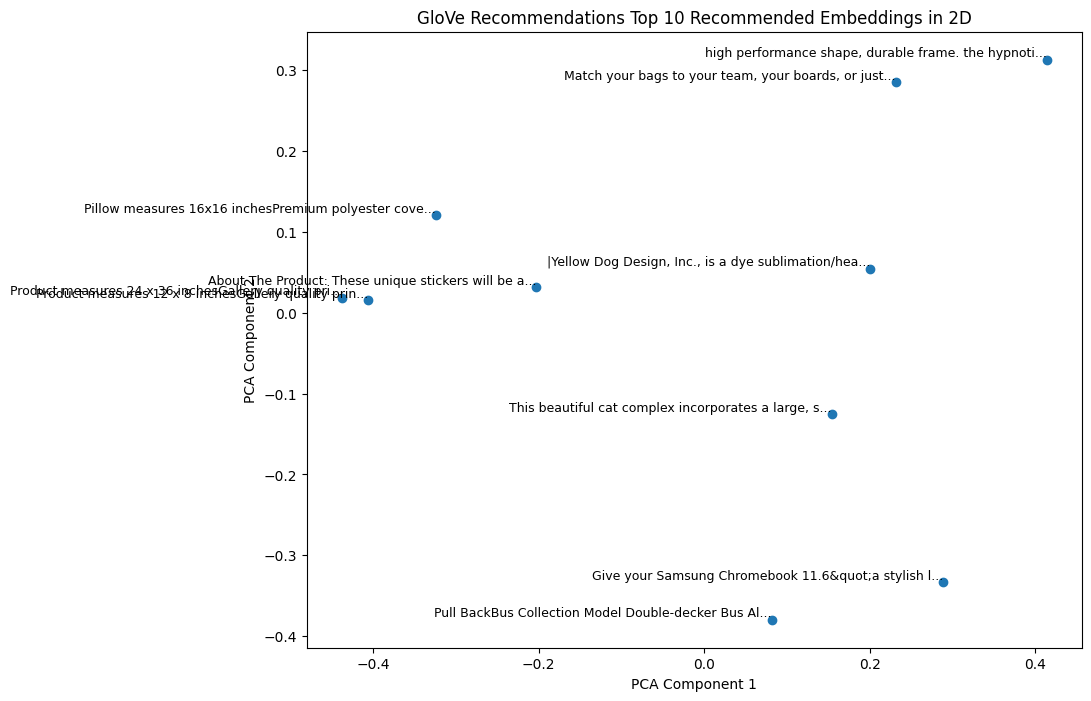

In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
import gensim.downloader as api
import re

# ------------------- 1. Load Pretrained Word Embeddings -------------------
def load_word_embeddings():
    """
    Loads pre-trained Word2Vec and GloVe word embeddings.  Handles potential download errors.

    Returns:
        tuple: (word2vec_model, glove_model) or (None, None) if loading fails.
    """
    word2vec_model = None
    glove_model = None
    try:
        print("Loading Word2Vec model...")
        word2vec_model = api.load("word2vec-google-news-300")
        print("Word2Vec model loaded successfully.")
    except Exception as e:
        print(f"Error loading Word2Vec: {e}")
        print("Continuing without Word2Vec.")

    try:
        print("Loading GloVe model...")
        # Load GloVe embeddings directly into a dictionary
        glove_df = pd.read_csv("/content/glove.6B.300d.txt", sep=" ", quoting=3, header=None, index_col=0)
        glove_model = {key: value.values for key, value in glove_df.T.items()}
        print("GloVe model loaded successfully.")
    except Exception as e:
        print(f"Error loading GloVe: {e}")
        print("Continuing without GloVe.")
    return word2vec_model, glove_model



# ------------------- 2. Generate Sentence Embeddings -------------------
def get_sentence_vector(sentence, model, embedding_size=300):
    """
    Get sentence embedding by averaging word vectors. Handles the case where the model is None.

    Args:
        sentence (str): The input sentence.
        model:  A word embedding model (e.g., Word2Vec, GloVe) or None.
        embedding_size (int, optional): The dimensionality of the word embeddings. Defaults to 300.

    Returns:
        numpy.ndarray: The sentence embedding, or a zero vector if the model is None or no words are found.
    """
    if model is None:
        return np.zeros(embedding_size)

    words = nltk.word_tokenize(sentence.lower())
    sentence_vector = np.zeros((embedding_size,))
    count = 0

    for word in words:
        try:
            if word in model:
                sentence_vector += model[word]
                count += 1
        except KeyError:
            pass  # Word not in vocab, skip it

    return sentence_vector / count if count > 0 else sentence_vector



# ------------------- 3. Compute Embeddings for all product descriptions -------------------
def get_all_sentence_embeddings(product_descriptions, word2vec_model, glove_model, embedding_size=300):
    """
    Generates sentence embeddings for all product descriptions using Word2Vec and GloVe.

    Args:
        product_descriptions (list): List of product descriptions.
        word2vec_model: Pre-trained Word2Vec model (or None).
        glove_model: Pre-trained GloVe model (or None).
        embedding_size (int): The dimension of the word embeddings.

    Returns:
        dict: A dictionary containing  "Word2Vec" and "GloVe" embeddings.  The values
              are numpy arrays.  If a model is None, the corresponding value will be an
              empty array.
    """
    embeddings_dict = {}

    if word2vec_model is not None:
        word2vec_embeddings = np.array([
            get_sentence_vector(desc, word2vec_model, embedding_size) for desc in product_descriptions
        ])
        embeddings_dict["Word2Vec"] = word2vec_embeddings
    else:
        embeddings_dict["Word2Vec"] = np.array([])

    if glove_model is not None:
        glove_embeddings = np.array([
            get_sentence_vector(desc, glove_model, embedding_size) for desc in product_descriptions
        ])
        embeddings_dict["GloVe"] = glove_embeddings
    else:
        embeddings_dict["GloVe"] = np.array([])
    return embeddings_dict



# ------------------- 4. Handle NaN Embeddings -------------------
def fix_nan_embeddings(embeddings, strategy="remove"):
    """
    Handle NaN values in embeddings.

    Args:
        embeddings (numpy.ndarray): Input embedding matrix.
        strategy (str, optional): "remove" (drop NaN rows), "zero" (replace with 0), or "mean"
            (replace with column mean). Defaults to "remove".

    Returns:
        numpy.ndarray: Cleaned embeddings.  If input is not a numpy array, or the strategy is invalid,
                        the original input is returned.
    """
    if not isinstance(embeddings, np.ndarray):
        print(f"Warning: fix_nan_embeddings input is not a numpy array. Returning original input.")
        return embeddings

    if not np.isnan(embeddings).any():
        return embeddings  # No NaNs found

    if strategy == "remove":
        cleaned_embeddings = embeddings[~np.isnan(embeddings).any(axis=1)]
        if cleaned_embeddings.size == 0:
            print("Warning: All embeddings were removed because they contained NaNs.")
        return cleaned_embeddings
    elif strategy == "zero":
        embeddings[np.isnan(embeddings)] = 0
        return embeddings
    elif strategy == "mean":
        col_mean = np.nanmean(embeddings, axis=0)
        nan_indices = np.where(np.isnan(embeddings))
        embeddings[nan_indices] = np.take(col_mean, nan_indices[1])
        return embeddings
    else:
        print(f"Warning: Invalid strategy '{strategy}'.  Returning original input.")
        return embeddings



# ------------------- 5. Compute Similarity Scores -------------------
def get_most_similar(query_index, embeddings, descriptions, method="Embedding Model", top_n=10):
    """
    Compute the most similar products based on cosine similarity.  Handles NaN
    values by skipping products with NaN embeddings.

    Args:
        query_index (int): Index of the query product.
        embeddings (numpy.ndarray): Array of product embeddings.
        descriptions (list): List of product descriptions.
        method (str, optional): Name of the embedding method. Defaults to "Embedding Model".
        top_n (int, optional): Number of top similar products to retrieve. Defaults to 10.

    Returns:
        tuple: (top_embeddings, top_descriptions) -  Numpy array of top-n embeddings,
               list of top-n product descriptions.  Returns empty arrays if no valid
               recommendations can be made.
    """
    if not isinstance(embeddings, np.ndarray):
        print(f"Error: Embeddings must be a numpy array in get_most_similar.  Got {type(embeddings)}")
        return np.array([]), []

    if len(embeddings) <= query_index:
        print(f"Error: query_index ({query_index}) is out of bounds for embeddings (length {len(embeddings)}) in get_most_similar.")
        return np.array([]), []

    if any(np.isnan(embeddings[query_index])):
        print(f"Warning: Query product embedding at index {query_index} contains NaN.  Cannot compute similarity.")
        return np.array([]), []

    similarities = cosine_similarity([embeddings[query_index]], embeddings)[0]
    sorted_indices = np.argsort(similarities)[::-1][1:]  # Exclude itself

    unique_descriptions = set()
    top_indices = []
    top_similarities = []
    for idx in sorted_indices:
        if not any(np.isnan(embeddings[idx])) and descriptions[idx] not in unique_descriptions:
            unique_descriptions.add(descriptions[idx])
            top_indices.append(idx)
            top_similarities.append(similarities[idx])
            if len(top_indices) == top_n:
                break

    if not top_indices:  # Check if any valid recommendations were found
        print(f"Warning: No valid recommendations found for '{descriptions[query_index]}' using {method} (likely due to NaN embeddings).")
        return np.array([]), []

    print(f"\n🔹 Top {top_n} Recommendations for: '{descriptions[query_index]}' using {method}")
    for idx, similarity in zip(top_indices, top_similarities):
        print(f"  ✅ {descriptions[idx]} (Similarity: {similarity:.2f})")

    top_embeddings = embeddings[top_indices]
    top_descriptions = [descriptions[idx] for idx in top_indices]
    return top_embeddings, top_descriptions



# ------------------- 6. Visualizing Top 10 Recommended Embeddings -------------------
def plot_embeddings(embeddings, descriptions, title, max_label_length=30):
    """
    Visualize the embeddings of the top recommended products.  Handles the case
    where the input embeddings are empty.

    Args:
        embeddings (numpy.ndarray): Array of product embeddings.
        descriptions (list): List of product descriptions.
        title (str): Title of the plot.
        max_label_length (int, optional): Maximum length of the product description labels. Defaults to 30.
    """
    if not embeddings.size:
        print(f"Warning: plot_embeddings called with empty embeddings array.  No plot will be generated for '{title}'.")
        return

    # Truncate descriptions to avoid long labels
    truncated_labels = [desc[:max_label_length] + '...' if len(desc) > max_label_length else desc for desc in descriptions]

    # Apply PCA
    pca = PCA(n_components=2)
    try:
        reduced_embeddings = pca.fit_transform(embeddings)
    except ValueError as e:
        print(f"Error in PCA: {e}.  Input embeddings may contain NaN or be of incorrect shape for '{title}'.")
        return

    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o')

    # Annotate
    for i, label in enumerate(truncated_labels):
        plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9, ha='right', va='bottom')

    plt.title(f"{title} Top 10 Recommended Embeddings in 2D")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()



# ------------------- 7. Running for Multiple Models -------------------
def process_and_plot(query_product, product_descriptions, embeddings_dict, top_n=10):
    """
    Process and plot the top recommendations for multiple models (Word2Vec, GloVe).
    Handles cases where a model produces no valid recommendations.

    Args:
        query_product (int): Index of the query product.
        product_descriptions (list): List of product descriptions.
        embeddings_dict (dict): Dictionary of embedding models (e.g., {"Word2Vec": word2vec_embeddings, ...}).
        top_n (int, optional): Number of top similar products to retrieve. Defaults to 10.
    """
    for method, embeddings in embeddings_dict.items():
        if embeddings.size == 0:
            print(f"\nSkipping {method} because its embeddings are empty.")
            continue

        # Verify no NaN values remain
        embeddings = fix_nan_embeddings(embeddings, strategy="remove") # Handle NaNs
        if embeddings.size == 0:
            print(f"\nSkipping {method} because all its embeddings were removed due to NaNs.")
            continue

        print(f"\n📝 Running recommendations using {method} embeddings:")
        top_embeddings, top_descriptions = get_most_similar(query_product, embeddings, product_descriptions, method, top_n)
        if top_embeddings.size:  # Check if top_embeddings is not empty
            plot_embeddings(top_embeddings, top_descriptions, f"{method} Recommendations", max_label_length=50)
        else:
            print(f"Warning: No plot generated for {method} due to empty embeddings.")



def main():
    """
    Main function to load data, generate embeddings, and display recommendations.
    """
    # Load data
    df = pd.read_csv("/content/Rec_sys_content.csv", quotechar='"', escapechar="\\")
    product_descriptions = df.iloc[:, 2].dropna().astype(str).tolist()
    product_descriptions = [re.sub(r'$', '', description) for description in product_descriptions]

    # Load word embeddings
    word2vec_model, glove_model = load_word_embeddings()
    if word2vec_model is None and glove_model is None:
        print("Error: Failed to load both Word2Vec and GloVe models. Exiting.")
        return

    # Generate  embeddings.
    embeddings_dict = get_all_sentence_embeddings(product_descriptions, word2vec_model, glove_model)

    # Choose a product to base recommendations on
    query_product = 0  # Choose the first product

    # Process and visualize
    process_and_plot(query_product, product_descriptions, embeddings_dict, top_n=10)



if __name__ == "__main__":
    main()
